In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
N = 100
n_feature = 3
x_data = np.random.normal(0, 1, size = (N, n_feature))
y_data = np.sum(x_data, axis = 1) + 0.2 * np.random.normal(0, 1, size = (N,))

print(x_data.shape)
print(np.sum(x_data, axis = 1).shape)

(100, 3)
(100,)


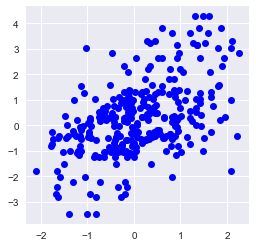

In [37]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (4, 4))
ax.plot(x_data, y_data, 'bo')

## Dataset Generator

In [184]:
class dataset_generator:
    def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient = None
        self._init_set_coefficient()
        
    def _init_set_coefficient(self):
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0]
        
    def set_n_sample(self, n_sample):
        self._n_sample = n_sample
        
    def set_noise(self, noise):
        self._noise = noise
        
    def set_coefficient(self, coefficient_list):
        self._coefficient = coefficient_list
    
    def make_dataset(self):
        x_data = np.random.normal(0, 1, size = (self._n_sample,
                                                self._feature_dim))
        y_data = np.zeros(shape = (self._n_sample, 1))
        for feature_idx in range(self._feature_dim): # x1 * w1 + ...
            y_data += self._coefficient[feature_idx] * x_data[:, feature_idx].reshape(-1, 1)
        y_data += self._coefficient[-1] # bias
        y_data += self._noise * np.random.normal(0, 1, size = (self._n_sample, 1))
        
        return x_data, y_data
    
    def dataset_visualizer(self):
        if self._feature_dim == 1:
            plt.style.use('seaborn')
            fig, ax = plt.subplots(figsize = (5, 5))
            ax.plot(x_data, y_data, 'bo',
                    alpha = 0.3,
                    markersize = 10)
            ax.tick_params(axis = 'both',
                           labelsize = 10)
            ax.set_title("DATASET", fontsize = 20, color = 'darkred')
            ax.set_xlabel("X data", fontsize = 15, alpha = 0.6)
            ax.set_ylabel("Y data", fontsize = 15, alpha = 0.6)
        else:
            class feature_dim_error(Exception):
                pass
            raise feature_dim_error("Visualization is valid for only one feature dimention.")

In [185]:
data_gen = dataset_generator(feature_dim=3)
print(data_gen._coefficient)

[1, 1, 1, 0]


In [186]:
data_gen.set_coefficient([2, -1, 3, 5])
print(data_gen._coefficient)

[2, -1, 3, 5]


In [194]:
x, y = data_gen.make_dataset()

In [195]:
data_gen.set_n_sample(200)
print(data_gen._n_sample)

200


In [196]:
data_gen = dataset_generator(feature_dim=1)

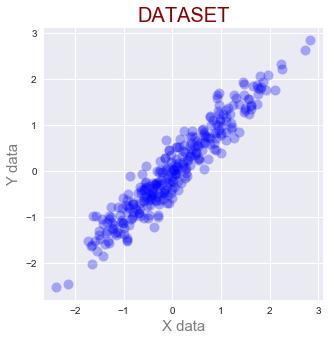

In [197]:
data_gen.dataset_visualizer()